In [77]:
import pandas as pd #Manejo de datos
import numpy as np #Manejo de datos
import plotly.express as px #Gráficos
import matplotlib.pyplot as plt #Gráficos
from plotly.subplots import make_subplots #Gráficos

## Base de Datos Retiros

In [275]:
"""----------------------Cargamos las bd----------------"""

retirement_info = pd.read_csv('https://raw.githubusercontent.com/josehiguita0722/Caso-Estudio-Anal-tica-3/main/retirement_info.csv', sep=';')

In [276]:
"""-------------------Verificamos su correcta carga-----------------------"""

retirement_info
#LA base de datos cuenta con 23 atributos y su índice. Tiene datos de 4410 empleados

,EmployeeID,Attrition,retirementDate,retirementType,resignationReason
0,2,Yes,15/10/2016,Resignation,Others
1,7,Yes,20/07/2016,Resignation,Stress
2,14,Yes,08/11/2016,Resignation,Others
3,29,Yes,15/10/2016,Resignation,Others
4,31,Yes,08/02/2016,Resignation,Salary
...,...,...,...,...,...
706,4382,Yes,18/04/2016,Resignation,Salary
707,4387,Yes,16/09/2016,Resignation,Others
708,4389,Yes,24/05/2016,Resignation,Others
709,4392,Yes,26/02/2016,Fired,NaN


In [277]:
retirement_info = retirement_info.set_index('EmployeeID') #Convertimos el número de empleado en el índice

In [278]:
retirement_info.dtypes #Se observa el tipo de cada una de las variables en la base de datos

Attrition            object
retirementDate       object
retirementType       object
resignationReason    object
dtype: object

In [279]:
retirement_info['retirementDate']= pd.to_datetime(retirement_info['retirementDate']) #Cambiamos la variable a formato fecha
retirement_info.dtypes

Attrition                    object
retirementDate       datetime64[ns]
retirementType               object
resignationReason            object
dtype: object

In [280]:
retirement_info.columns #Se observan las columnas

Index(['Attrition', 'retirementDate', 'retirementType', 'resignationReason'], dtype='object')

In [281]:
retirement_info['retirementType'].unique()
# Observamos que hay dos tipos de retiro que son: Renuncias y despidos, en el caso de estudio solo nos interesa predecir las renuncias

array(['Resignation', 'Fired'], dtype=object)

In [282]:
#filtramos los datos que tengan despidos
retirement_info1 = retirement_info.loc[retirement_info['retirementType'] == 'Resignation']
#empleados.loc[empleados['Nombre'] == 'Juan'] 
retirement_info1.head()
#De esta manera obtenemos un dataframe solo con renuncias

,Attrition,retirementDate,retirementType,resignationReason
EmployeeID,,,,
2,Yes,2016-10-15,Resignation,Others
7,Yes,2016-07-20,Resignation,Stress
14,Yes,2016-08-11,Resignation,Others
29,Yes,2016-10-15,Resignation,Others
31,Yes,2016-08-02,Resignation,Salary


In [283]:
retirement_info1

,Attrition,retirementDate,retirementType,resignationReason
EmployeeID,,,,
2,Yes,2016-10-15,Resignation,Others
7,Yes,2016-07-20,Resignation,Stress
14,Yes,2016-08-11,Resignation,Others
29,Yes,2016-10-15,Resignation,Others
31,Yes,2016-08-02,Resignation,Salary
...,...,...,...,...
4370,Yes,2016-06-07,Resignation,Others
4382,Yes,2016-04-18,Resignation,Salary
4387,Yes,2016-09-16,Resignation,Others


In [284]:
"""**Tratamiento de datos nulos**

"""

retirement_info1.isna().sum() #No se observan datos nulos

Attrition            0
retirementDate       0
retirementType       0
resignationReason    0
dtype: int64

In [285]:
retirement_info1['resignationReason'].unique()

array(['Others', 'Stress', 'Salary'], dtype=object)

In [286]:
rt = retirement_info1.copy() #Realizamos una copia de la base de datos para trabajar en ella
renuncias=pd.get_dummies(rt['retirementType']) #Creamos una base de datos con valores dummy de las personas que renunciaron o se retiraron 

In [287]:
renuncias

,Resignation
EmployeeID,
2,1
7,1
14,1
29,1
31,1
...,...
4370,1
4382,1
4387,1


## Base de Datos General

In [350]:
"""----------------------Cargamos las bd----------------"""

general_empleados = pd.read_csv('https://raw.githubusercontent.com/josehiguita0722/Caso-Estudio-Anal-tica-3/main/general_data.csv', sep=';')

In [351]:
"""-------------------Verificamos su correcta carga-----------------------"""

general_empleados
#LA base de datos cuenta con 23 atributos y su índice. Tiene datos de 4410 empleados

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,1,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,1,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,2,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,1,...,0.0,Y,14,8,1,10.0,2,9,7,8


In [352]:
general_empleados = general_empleados.set_index('EmployeeID') #Convertimos el número de empleado en el índice

In [353]:
general_empleados.columns #Se observan las columnas

Index(['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EmployeeCount', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'Over18',
       'PercentSalaryHike', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [354]:
general_empleados.dtypes #Se observa el tipo de cada una de las variables en la base de datos

Age                          int64
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
Over18                      object
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object

In [355]:
"""**Tratamiento de datos nulos del dataset general_empleados**"""

general_empleados.isna().sum() #Se observan que solo hay datos nulos en el número de compañias en las que los empleados han trabajado y en los años trabajados en la compañia.

Age                         0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [356]:
#se organiza los empleados por edad en orden de mayor a menor para aplicar un interpolated en los nulos de ambas columnas, 
#esto con el fin de que los años trabajados en la compañia y el numero de compañias rellenados tenga sentido.
empleados_por_edad = general_empleados.sort_values('Age',ascending=False)
empleados_por_edad.head(60)

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,JobRole,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeID,,,,,,,,,,,,,,,,,,,,,
952,60,Travel_Rarely,Sales,17,4,Medical,1,Male,1,Manager,...,3.0,Y,13,8,1,19.0,5,1,0,0
3110,60,Travel_Frequently,Research & Development,16,3,Life Sciences,1,Female,4,Laboratory Technician,...,4.0,Y,20,8,0,22.0,4,18,13,11
170,60,Travel_Frequently,Research & Development,16,3,Life Sciences,1,Female,4,Laboratory Technician,...,4.0,Y,20,8,0,22.0,4,18,13,11
1624,60,Travel_Rarely,Research & Development,10,3,Life Sciences,1,Female,1,Manufacturing Director,...,5.0,Y,18,8,1,33.0,4,29,11,10
2422,60,Travel_Rarely,Sales,17,4,Medical,1,Male,1,Manager,...,3.0,Y,13,8,1,19.0,5,1,0,0
1749,60,Travel_Rarely,Research & Development,8,2,Life Sciences,1,Female,5,Laboratory Technician,...,8.0,Y,20,8,0,10.0,3,2,2,2
2092,60,Travel_Rarely,Sales,2,2,Life Sciences,1,Male,2,Sales Executive,...,0.0,Y,14,8,1,12.0,3,11,1,9
1640,60,Travel_Frequently,Research & Development,16,3,Life Sciences,1,Female,4,Laboratory Technician,...,4.0,Y,20,8,0,22.0,4,18,13,11
3892,60,Travel_Rarely,Sales,17,4,Medical,1,Male,1,Manager,...,3.0,Y,13,8,1,19.0,5,1,0,0


In [357]:
#Al nuevo dataframe aplicamos le tratamiento de estos datos nulos con interpolated
# interpolate(): # va a interpolar los valores medios entre dos filas, nos dice cual seria el valor medio entre los registros (interpolación lineal)
general_empleados1 = empleados_por_edad.interpolate() # aplicar método
general_empleados1 = general_empleados1.sort_values('EmployeeID',ascending=False).reset_index()  #Ordenamos el dataframe de acuerdo al ID como estaba inicialmente 
general_empleados1.isna().sum()  # verificamos si el dataset quedó con datos nulos

EmployeeID                 0
Age                        0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [358]:
general_empleados1 = general_empleados1.set_index('EmployeeID') #Convertimos el número de empleado en el índice

In [359]:
"""**Descripción de cada atributo cuantitativo**"""

"""------- Analizamos brevemente cada atributo cuantitativo -------"""

general_empleados1.describe()  
#Age: La media de edad de la empresa es de personas con experiencia, donde no se tienen personas menores de edad.
#DistanceFromHome	: El empleado que vive más lejos está a 29 km de su casa y el que está más cerca, está a 1 km de su casa.
#Education: El nivel de educación está en 1 y 5.
#EmployeeID: El ID de los empleados coincide con el número de los empleados.
#JobLevel:	Job level at company on a scale of 1 to 5.
#MonthlyIncome: la media del salario mensual de los trabajadores es de 65029 rupias, los empleados que ganan menos es de 10090 y el que más gana 199990 rupias.
#NumCompaniesWorked: La cantidad de empresas promedio en la que trabajan los empleados es de 2.694830	, 
#                    la empresa cuenta con empleados de primera experiencia y experimentados de 9 empresas.
#PercentSalaryHike: A todos los empleados se les aumentó el salario, el porcentaje promedio que se le aumentó fue de 15.209524 porciento.	
#StandardHours: Todos los empleados trabajan una jornada de 8 horas.
#TotalWorkingYears: Como era de esperarse hay empleados que no han cumplido el primer año de trabajo y hay algunos hasta con 40 años laborando.
#TrainingTimesLastYear: El máximo de capacitaciones al año son 6 probablemente a los empleados más nuevos y 0 capacitaciones a algunos empleados 
#                       que probablemente son los más antiguos.
#YearsAtCompany: Hay empleados que llevan 40 años en la empresa lo que indica que llevan toda su vida laborando en esta y otros que no llegan al año lo que indica que 
#                es su primera empresa en la que laboran.
#YearsSinceLastPromotion: Hay empleados que llevan 15 años sin ser promovidos
#YearsWithCurrManager: Como el máximo es 17 años, se deduce que el gerente actual lleva 17 años en el cargo.

,Age,DistanceFromHome,Education,EmployeeCount,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2.063946,65029.312925,2.693878,15.209524,8.0,0.793878,11.284467,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,0.0,1.106689,47068.888559,2.496277,3.659108,0.0,0.851883,7.779645,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.0,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [360]:
general_empleados1['StockOptionLevel'].value_counts() #???
general_empleados1['TotalWorkingYears'].value_counts() #Hay más cantidad de empleados que llevan 10 años laborando. 
general_empleados1['YearsSinceLastPromotion'].value_counts() #La mayoría de empleados que no son promovidos son los que llevan menos tiempo
general_empleados1['NumCompaniesWorked'].value_counts()

1.0    1565
0.0     586
3.0     475
2.0     439
4.0     416
7.0     222
6.0     208
5.0     190
9.0     156
8.0     147
0.5       2
5.5       1
3.5       1
4.5       1
1.5       1
Name: NumCompaniesWorked, dtype: int64

In [361]:
"""**Observación de cada dato contenido en las variables categóricas**



"""

"""------- Buscamos tipos de datos en cada variable categórica-------"""

general_empleados1['Department'].unique() #Hay 3 departamentos 'Sales', 'Research & Development', 'Human Resources'
general_empleados1['BusinessTravel'].unique() #'Travel_Rarely', 'Travel_Frequently', 'Non-Travel'= 'Viaje_rara vez', 'Viaje_frecuentemente', 'No viajes'
general_empleados1['EducationField'].unique() # Se consideran 6 áreas de educación Life Sciences', 'Other', 'Medical', 'Marketing','Technical Degree', 'Human Resources'
general_empleados1['Gender'].unique() # Hombre y Mujer
general_empleados1['JobRole'].unique() # Hay 9 tipos de puestos de trabajos
general_empleados1['MaritalStatus'].unique() #'Married', 'Single', 'Divorced' = 'Casado', 'Soltero', 'Divorciado'
general_empleados1['Over18'].unique() #Todos los empleados son mayor de edad

array(['Y'], dtype=object)

In [362]:
"""**Gráficos de pastel**"""

# Gráfico de pastel CORREGIDO

# Creating plot
basegraficar = general_empleados1.groupby(['Department'])[['EmployeeCount']].count().sort_values('EmployeeCount', ascending = False).reset_index()
basegraficar.head()

fig = px.pie(basegraficar, values = basegraficar['EmployeeCount'],  names = basegraficar['Department'],
        title = '<b>Porcentaje de empleados por departamento<b>',
             color_discrete_sequence = px.colors.qualitative.G10
        )

fig.show()

In [363]:
# Gráfico de pastel

# Creating plot

basegraficar = general_empleados1.groupby(['Department'])[['EmployeeCount']].count().sort_values('EmployeeCount', ascending = False).reset_index()
basegraficar.head()

fig = px.pie(general_empleados['Gender'].unique(), values = general_empleados['Gender'].value_counts(),  names = general_empleados['Gender'].unique(),
        title = '<b>Porcentaje de Hombres y Mujeres<b>',
             color_discrete_sequence = px.colors.qualitative.G10
        )

fig.show()

In [364]:
del(general_empleados1['EmployeeCount'])
del(general_empleados1['Over18'])
del(general_empleados1['StandardHours'])

In [365]:
general_empleados1

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeID,,,,,,,,,,,,,,,,,,,
4410,40,Travel_Rarely,Research & Development,28,3,Medical,Male,2,Laboratory Technician,Divorced,54680,0.0,12,0,15.0,6,21,3,9
4409,42,Travel_Rarely,Sales,18,2,Medical,Male,1,Laboratory Technician,Divorced,23980,0.0,14,1,10.0,2,9,7,8
4408,25,Travel_Rarely,Research & Development,25,2,Life Sciences,Male,2,Sales Executive,Married,37020,0.0,20,0,5.0,4,4,1,2
4407,29,Travel_Rarely,Research & Development,2,4,Medical,Male,1,Laboratory Technician,Divorced,26790,2.0,15,0,10.0,2,3,0,2
4406,42,Travel_Rarely,Research & Development,5,4,Medical,Female,1,Research Scientist,Single,60290,3.0,17,1,10.0,5,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,32,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,23420,4.0,12,2,9.0,2,6,0,4
4,38,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,83210,3.0,11,3,13.0,5,8,7,5
3,32,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,193280,1.0,15,3,5.0,2,5,0,3


## Base de Datos Encuesta de Desempeño de Empleados

In [101]:
"""----------------------Cargamos las Bases de datos----------------"""
desempeno = pd.read_csv('https://raw.githubusercontent.com/josehiguita0722/Caso-Estudio-Anal-tica-3/main/manager_survey_data.csv')
desempeno

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3
...,...,...,...
4405,4406,3,3
4406,4407,2,3
4407,4408,3,4
4408,4409,2,3


In [102]:
"""---------------------Revisión de datos faltantes----------------"""
for i in desempeno.columns:
  a = desempeno[i].isna().sum()
  if a == 4410:
    del(desempeno[i])
  print(i,a)
  #No se tiene datos nulos en la base de datos

EmployeeID 0
JobInvolvement 0
PerformanceRating 0


In [103]:
desempeno = desempeno.set_index('EmployeeID') #Convertimos el número de empleado en el índice

In [104]:
print(desempeno['JobInvolvement'].unique()) 
print(desempeno['PerformanceRating'].unique()) #Solo se tienen desempeños excelentes y sobresalientes(3 y 4 respectivamente)

[3 2 1 4]
[3 4]


In [105]:
desempeno['PerformanceRating'].value_counts()

3    3732
4     678
Name: PerformanceRating, dtype: int64

In [106]:
desempeno['JobInvolvement'].value_counts()

3    2604
2    1125
4     432
1     249
Name: JobInvolvement, dtype: int64

In [107]:
desempeno.dtypes

JobInvolvement       int64
PerformanceRating    int64
dtype: object

<AxesSubplot:>

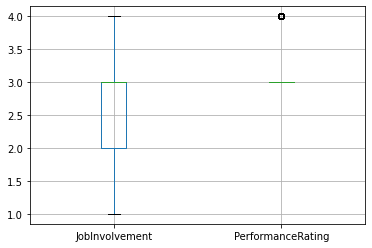

In [108]:
desempeno.boxplot() # La calificación de desempeño tiene un sesgo, cómo ya se había evidenciado sólo valoraciones de 3 y 4

In [109]:
# Gráfico de pastel

# Creating plot

fig = px.pie(desempeno['JobInvolvement'].unique(), values = desempeno['JobInvolvement'].value_counts(),  names = desempeno['JobInvolvement'].unique(),
        title = '<b>Nivel de participación en el trabajo<b>',
             color_discrete_sequence = px.colors.qualitative.G10
        )

fig.show()
#Del grafico se observa que en un 59% de los empleados se tienen una participación alta(3)

In [110]:
# Creating plot

fig = px.pie(desempeno['PerformanceRating'].unique(), values = desempeno['PerformanceRating'].value_counts(),  names = desempeno['PerformanceRating'].unique(),
        title = '<b>Calificación de desempeño del año pasado<b>',
             color_discrete_sequence = px.colors.qualitative.G10
        )

fig.show()


## Base de Datos Hora de Salida

In [111]:
"""----------------------Cargamos la Base de datos----------------"""
out_time = pd.read_csv('https://raw.githubusercontent.com/josehiguita0722/Caso-Estudio-Anal-tica-3/main/out_time.csv')
out_time
# La base de datos cuenta con 261 variables de fecha y el número de identificación de empleado. Tiene datos de 4410 empleados
# Cada variable hace referencia a la hora de salida en cada fecha de los operarios en el año 2015

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,...,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,NaN,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
1,2,NaN,2015-01-02 18:22:17,2015-01-05 17:48:22,NaN,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaN,NaN,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
2,3,NaN,2015-01-02 16:59:14,2015-01-05 17:06:46,2015-01-06 16:38:32,2015-01-07 16:33:21,2015-01-08 17:24:22,2015-01-09 16:57:30,2015-01-12 17:28:54,2015-01-13 17:21:25,...,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,NaN,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
3,4,NaN,2015-01-02 17:25:24,2015-01-05 17:14:03,2015-01-06 17:07:42,2015-01-07 16:32:40,2015-01-08 16:53:11,2015-01-09 17:19:47,2015-01-12 17:13:37,2015-01-13 17:11:45,...,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,NaN,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
4,5,NaN,2015-01-02 18:31:37,2015-01-05 17:49:15,2015-01-06 17:26:25,2015-01-07 17:37:59,2015-01-08 17:59:28,2015-01-09 17:44:08,2015-01-12 18:51:21,2015-01-13 18:14:58,...,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,NaN,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,NaN,2015-01-02 17:27:37,2015-01-05 19:08:20,2015-01-06 18:50:49,2015-01-07 18:57:40,2015-01-08 17:58:31,2015-01-09 18:06:15,2015-01-12 17:58:48,2015-01-13 18:10:35,...,2015-12-18 18:06:05,2015-12-21 18:35:06,2015-12-22 18:33:44,2015-12-23 18:40:56,2015-12-24 18:21:29,NaN,2015-12-28 18:44:35,2015-12-29 19:14:38,2015-12-30 18:24:56,2015-12-31 18:30:41
4406,4407,NaN,2015-01-02 16:19:01,NaN,2015-01-06 15:07:37,2015-01-07 15:25:50,2015-01-08 16:12:33,2015-01-09 15:26:56,2015-01-12 16:10:42,2015-01-13 16:22:43,...,2015-12-18 15:23:02,2015-12-21 15:31:14,2015-12-22 15:45:59,2015-12-23 16:38:59,2015-12-24 15:47:15,NaN,2015-12-28 15:34:34,2015-12-29 16:47:02,2015-12-30 16:03:17,2015-12-31 16:18:39
4407,4408,NaN,2015-01-02 17:17:35,2015-01-05 17:08:07,2015-01-06 17:27:46,2015-01-07 18:27:22,2015-01-08 17:05:25,2015-01-09 17:02:57,2015-01-12 17:35:45,2015-01-13 17:15:52,...,2015-12-18 17:48:05,2015-12-21 17:43:05,2015-12-22 17:47:23,2015-12-23 17:43:37,2015-12-24 17:20:12,NaN,2015-12-28 17:43:28,NaN,2015-12-30 17:48:14,2015-12-31 18:08:55
4408,4409,NaN,2015-01-02 19:48:37,2015-01-05 19:37:40,2015-01-06 20:00:08,2015-01-07 19:35:59,2015-01-08 18:55:13,NaN,2015-01-12 19:18:17,2015-01-13 19:24:02,...,2015-12-18 19:52:44,2015-12-21 19:21:35,2015-12-22 19:32:40,2015-12-23 18:57:00,2015-12-24 19:37:57,NaN,2015-12-28 19:58:36,2015-12-29 18:55:26,2015-12-30 19:37:22,2015-12-31 19:33:45


In [112]:
out_time.rename(columns = {'Unnamed: 0':'EmployeeID'}, inplace = True)

In [113]:
"""------- Buscamos datos nulos en cada variable -------"""

for i in out_time.columns:
  a=out_time[i].isna().sum()
  print(i,a)
out_time

#Hay varios días en los que no asistió ningún empleado,  suponiendo que fue orden de la empresa la falta

EmployeeID 0
2015-01-01 4410
2015-01-02 209
2015-01-05 206
2015-01-06 228
2015-01-07 209
2015-01-08 243
2015-01-09 215
2015-01-12 239
2015-01-13 265
2015-01-14 4410
2015-01-15 236
2015-01-16 264
2015-01-19 228
2015-01-20 241
2015-01-21 240
2015-01-22 240
2015-01-23 249
2015-01-26 4410
2015-01-27 217
2015-01-28 212
2015-01-29 276
2015-01-30 208
2015-02-02 208
2015-02-03 206
2015-02-04 212
2015-02-05 211
2015-02-06 211
2015-02-09 224
2015-02-10 219
2015-02-11 226
2015-02-12 236
2015-02-13 212
2015-02-16 222
2015-02-17 244
2015-02-18 229
2015-02-19 217
2015-02-20 212
2015-02-23 241
2015-02-24 226
2015-02-25 234
2015-02-26 238
2015-02-27 236
2015-03-02 254
2015-03-03 228
2015-03-04 231
2015-03-05 4410
2015-03-06 242
2015-03-09 232
2015-03-10 243
2015-03-11 232
2015-03-12 219
2015-03-13 191
2015-03-16 219
2015-03-17 231
2015-03-18 237
2015-03-19 239
2015-03-20 223
2015-03-23 207
2015-03-24 217
2015-03-25 203
2015-03-26 218
2015-03-27 235
2015-03-30 222
2015-03-31 211
2015-04-01 218
2015-04-

,EmployeeID,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,...,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,NaN,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
1,2,NaN,2015-01-02 18:22:17,2015-01-05 17:48:22,NaN,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaN,NaN,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
2,3,NaN,2015-01-02 16:59:14,2015-01-05 17:06:46,2015-01-06 16:38:32,2015-01-07 16:33:21,2015-01-08 17:24:22,2015-01-09 16:57:30,2015-01-12 17:28:54,2015-01-13 17:21:25,...,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,NaN,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
3,4,NaN,2015-01-02 17:25:24,2015-01-05 17:14:03,2015-01-06 17:07:42,2015-01-07 16:32:40,2015-01-08 16:53:11,2015-01-09 17:19:47,2015-01-12 17:13:37,2015-01-13 17:11:45,...,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,NaN,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
4,5,NaN,2015-01-02 18:31:37,2015-01-05 17:49:15,2015-01-06 17:26:25,2015-01-07 17:37:59,2015-01-08 17:59:28,2015-01-09 17:44:08,2015-01-12 18:51:21,2015-01-13 18:14:58,...,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,NaN,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,NaN,2015-01-02 17:27:37,2015-01-05 19:08:20,2015-01-06 18:50:49,2015-01-07 18:57:40,2015-01-08 17:58:31,2015-01-09 18:06:15,2015-01-12 17:58:48,2015-01-13 18:10:35,...,2015-12-18 18:06:05,2015-12-21 18:35:06,2015-12-22 18:33:44,2015-12-23 18:40:56,2015-12-24 18:21:29,NaN,2015-12-28 18:44:35,2015-12-29 19:14:38,2015-12-30 18:24:56,2015-12-31 18:30:41
4406,4407,NaN,2015-01-02 16:19:01,NaN,2015-01-06 15:07:37,2015-01-07 15:25:50,2015-01-08 16:12:33,2015-01-09 15:26:56,2015-01-12 16:10:42,2015-01-13 16:22:43,...,2015-12-18 15:23:02,2015-12-21 15:31:14,2015-12-22 15:45:59,2015-12-23 16:38:59,2015-12-24 15:47:15,NaN,2015-12-28 15:34:34,2015-12-29 16:47:02,2015-12-30 16:03:17,2015-12-31 16:18:39
4407,4408,NaN,2015-01-02 17:17:35,2015-01-05 17:08:07,2015-01-06 17:27:46,2015-01-07 18:27:22,2015-01-08 17:05:25,2015-01-09 17:02:57,2015-01-12 17:35:45,2015-01-13 17:15:52,...,2015-12-18 17:48:05,2015-12-21 17:43:05,2015-12-22 17:47:23,2015-12-23 17:43:37,2015-12-24 17:20:12,NaN,2015-12-28 17:43:28,NaN,2015-12-30 17:48:14,2015-12-31 18:08:55
4408,4409,NaN,2015-01-02 19:48:37,2015-01-05 19:37:40,2015-01-06 20:00:08,2015-01-07 19:35:59,2015-01-08 18:55:13,NaN,2015-01-12 19:18:17,2015-01-13 19:24:02,...,2015-12-18 19:52:44,2015-12-21 19:21:35,2015-12-22 19:32:40,2015-12-23 18:57:00,2015-12-24 19:37:57,NaN,2015-12-28 19:58:36,2015-12-29 18:55:26,2015-12-30 19:37:22,2015-12-31 19:33:45


In [114]:
out_time.shape
# Se eliminaron 12 columnas

(4410, 262)

In [115]:
"""-------Tipo de datos de las variables---"""
out_time.dtypes.value_counts()
#Todas son tipo objeto excepto por la primera. Así, teniendo en cuenta que la primera tiene el número de empleado se convierte en indice

object     249
float64     12
int64        1
dtype: int64

In [116]:
out_time=out_time.fillna(0)

In [117]:
"""------Cambios-----"""

out_time=out_time.set_index(['EmployeeID']) #Se convierte la columna del número de empleado en el índice

for i in out_time.columns: #Se convierten los datos a tipo tiempo
  out_time[i] = pd.to_datetime(out_time[i],)

out_time=out_time.fillna(0)

In [118]:
out_time

,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,1970-01-01,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,1970-01-01,...,1970-01-01 00:00:00,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,1970-01-01,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
2,1970-01-01,2015-01-02 18:22:17,2015-01-05 17:48:22,1970-01-01 00:00:00,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,1970-01-01,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,1970-01-01 00:00:00,1970-01-01,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
3,1970-01-01,2015-01-02 16:59:14,2015-01-05 17:06:46,2015-01-06 16:38:32,2015-01-07 16:33:21,2015-01-08 17:24:22,2015-01-09 16:57:30,2015-01-12 17:28:54,2015-01-13 17:21:25,1970-01-01,...,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,1970-01-01,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
4,1970-01-01,2015-01-02 17:25:24,2015-01-05 17:14:03,2015-01-06 17:07:42,2015-01-07 16:32:40,2015-01-08 16:53:11,2015-01-09 17:19:47,2015-01-12 17:13:37,2015-01-13 17:11:45,1970-01-01,...,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,1970-01-01,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
5,1970-01-01,2015-01-02 18:31:37,2015-01-05 17:49:15,2015-01-06 17:26:25,2015-01-07 17:37:59,2015-01-08 17:59:28,2015-01-09 17:44:08,2015-01-12 18:51:21,2015-01-13 18:14:58,1970-01-01,...,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,1970-01-01,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4406,1970-01-01,2015-01-02 17:27:37,2015-01-05 19:08:20,2015-01-06 18:50:49,2015-01-07 18:57:40,2015-01-08 17:58:31,2015-01-09 18:06:15,2015-01-12 17:58:48,2015-01-13 18:10:35,1970-01-01,...,2015-12-18 18:06:05,2015-12-21 18:35:06,2015-12-22 18:33:44,2015-12-23 18:40:56,2015-12-24 18:21:29,1970-01-01,2015-12-28 18:44:35,2015-12-29 19:14:38,2015-12-30 18:24:56,2015-12-31 18:30:41
4407,1970-01-01,2015-01-02 16:19:01,1970-01-01 00:00:00,2015-01-06 15:07:37,2015-01-07 15:25:50,2015-01-08 16:12:33,2015-01-09 15:26:56,2015-01-12 16:10:42,2015-01-13 16:22:43,1970-01-01,...,2015-12-18 15:23:02,2015-12-21 15:31:14,2015-12-22 15:45:59,2015-12-23 16:38:59,2015-12-24 15:47:15,1970-01-01,2015-12-28 15:34:34,2015-12-29 16:47:02,2015-12-30 16:03:17,2015-12-31 16:18:39
4408,1970-01-01,2015-01-02 17:17:35,2015-01-05 17:08:07,2015-01-06 17:27:46,2015-01-07 18:27:22,2015-01-08 17:05:25,2015-01-09 17:02:57,2015-01-12 17:35:45,2015-01-13 17:15:52,1970-01-01,...,2015-12-18 17:48:05,2015-12-21 17:43:05,2015-12-22 17:47:23,2015-12-23 17:43:37,2015-12-24 17:20:12,1970-01-01,2015-12-28 17:43:28,1970-01-01 00:00:00,2015-12-30 17:48:14,2015-12-31 18:08:55


In [119]:
df = out_time.copy()

In [120]:
bd = df.merge(renuncias,how='left',on='EmployeeID').fillna(0) #Unimos los datos sobre las renuncias con los de esta base de de datos y llenamos los datos inexistentes con 0
bd #Visualizamos

,EmployeeID,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31,Resignation
0,1,1970-01-01,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,...,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,1970-01-01,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33,0.0
1,2,1970-01-01,2015-01-02 18:22:17,2015-01-05 17:48:22,1970-01-01 00:00:00,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,...,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,1970-01-01 00:00:00,1970-01-01,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58,1.0
2,3,1970-01-01,2015-01-02 16:59:14,2015-01-05 17:06:46,2015-01-06 16:38:32,2015-01-07 16:33:21,2015-01-08 17:24:22,2015-01-09 16:57:30,2015-01-12 17:28:54,2015-01-13 17:21:25,...,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,1970-01-01,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50,0.0
3,4,1970-01-01,2015-01-02 17:25:24,2015-01-05 17:14:03,2015-01-06 17:07:42,2015-01-07 16:32:40,2015-01-08 16:53:11,2015-01-09 17:19:47,2015-01-12 17:13:37,2015-01-13 17:11:45,...,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,1970-01-01,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14,0.0
4,5,1970-01-01,2015-01-02 18:31:37,2015-01-05 17:49:15,2015-01-06 17:26:25,2015-01-07 17:37:59,2015-01-08 17:59:28,2015-01-09 17:44:08,2015-01-12 18:51:21,2015-01-13 18:14:58,...,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,1970-01-01,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,1970-01-01,2015-01-02 17:27:37,2015-01-05 19:08:20,2015-01-06 18:50:49,2015-01-07 18:57:40,2015-01-08 17:58:31,2015-01-09 18:06:15,2015-01-12 17:58:48,2015-01-13 18:10:35,...,2015-12-21 18:35:06,2015-12-22 18:33:44,2015-12-23 18:40:56,2015-12-24 18:21:29,1970-01-01,2015-12-28 18:44:35,2015-12-29 19:14:38,2015-12-30 18:24:56,2015-12-31 18:30:41,0.0
4406,4407,1970-01-01,2015-01-02 16:19:01,1970-01-01 00:00:00,2015-01-06 15:07:37,2015-01-07 15:25:50,2015-01-08 16:12:33,2015-01-09 15:26:56,2015-01-12 16:10:42,2015-01-13 16:22:43,...,2015-12-21 15:31:14,2015-12-22 15:45:59,2015-12-23 16:38:59,2015-12-24 15:47:15,1970-01-01,2015-12-28 15:34:34,2015-12-29 16:47:02,2015-12-30 16:03:17,2015-12-31 16:18:39,0.0
4407,4408,1970-01-01,2015-01-02 17:17:35,2015-01-05 17:08:07,2015-01-06 17:27:46,2015-01-07 18:27:22,2015-01-08 17:05:25,2015-01-09 17:02:57,2015-01-12 17:35:45,2015-01-13 17:15:52,...,2015-12-21 17:43:05,2015-12-22 17:47:23,2015-12-23 17:43:37,2015-12-24 17:20:12,1970-01-01,2015-12-28 17:43:28,1970-01-01 00:00:00,2015-12-30 17:48:14,2015-12-31 18:08:55,0.0
4408,4409,1970-01-01,2015-01-02 19:48:37,2015-01-05 19:37:40,2015-01-06 20:00:08,2015-01-07 19:35:59,2015-01-08 18:55:13,1970-01-01 00:00:00,2015-01-12 19:18:17,2015-01-13 19:24:02,...,2015-12-21 19:21:35,2015-12-22 19:32:40,2015-12-23 18:57:00,2015-12-24 19:37:57,1970-01-01,2015-12-28 19:58:36,2015-12-29 18:55:26,2015-12-30 19:37:22,2015-12-31 19:33:45,0.0


In [121]:
#Para el análsiis se podría estudiar en promedio a qué hora llegaban las personas que renunciaron y compararlo con el promedio de las demás personas
bd2= bd[bd['Resignation']==0]

In [122]:
#Necesitamos que el índice sea el empleado para poder transponerla y facilitar el análisis
bd=bd.set_index('EmployeeID')

In [123]:
#Transponemos
bd=bd.T

In [124]:
bd=bd.drop('Resignation',axis=0)

In [125]:
#Analizamos la forma correcta de extraer los datos que se necesitan

bd[2][0].hour
#bd[2][0].minute
#bd[2][0].second

0

In [126]:
""" --- ¿A qué hora llegaron en promedio los empleados que renunciaron? ---"""
horas1=[]
h=0
for i in bd.columns:
  for j in range(261):
    h += (bd[i][j].hour + (bd[i][j].minute/60 ) + (bd[i][j].second/120))
  horas1.append(h/262) #Creo que es mejor sacar la media, no el promedio
  h=0

In [127]:
salidas=pd.DataFrame(data = horas1, index=bd.columns, columns=['horas'] )

In [128]:
fig1=px.box(salidas) #En promedio los empleados que renunciaron tienen un rango de llegadas entre las 8:48 am y las 9:36 con un promedio de 9:13 aproximadamente
fig1.show()

## Base de Datos Hora de Ingreso

In [129]:
"""----------------------Cargamos las bd----------------"""
in_time = pd.read_csv('https://raw.githubusercontent.com/josehiguita0722/Caso-Estudio-Anal-tica-3/main/in_time.csv')

in_time

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,NaN,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,NaN,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,NaN,2015-01-02 10:15:44,2015-01-05 10:21:05,NaN,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,NaN,NaN,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,NaN,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,...,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,NaN,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
3,4,NaN,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,...,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,NaN,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
4,5,NaN,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,...,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,NaN,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,NaN,2015-01-02 09:20:32,2015-01-05 10:17:53,2015-01-06 10:26:51,2015-01-07 10:06:58,2015-01-08 09:45:06,2015-01-09 09:49:24,2015-01-12 09:37:10,2015-01-13 09:25:02,...,2015-12-18 10:01:06,2015-12-21 10:25:25,2015-12-22 10:16:11,2015-12-23 10:04:40,2015-12-24 09:45:40,NaN,2015-12-28 10:15:39,2015-12-29 10:10:09,2015-12-30 09:28:19,2015-12-31 10:00:12
4406,4407,NaN,2015-01-02 10:03:41,NaN,2015-01-06 09:44:00,2015-01-07 09:42:10,2015-01-08 10:00:57,2015-01-09 09:44:04,2015-01-12 10:07:32,2015-01-13 10:05:11,...,2015-12-18 09:27:32,2015-12-21 09:41:24,2015-12-22 09:50:30,2015-12-23 10:32:21,2015-12-24 09:47:41,NaN,2015-12-28 09:54:23,2015-12-29 10:13:32,2015-12-30 10:21:09,2015-12-31 10:09:48
4407,4408,NaN,2015-01-02 10:01:01,2015-01-05 09:33:00,2015-01-06 09:49:17,2015-01-07 10:28:12,2015-01-08 09:47:38,2015-01-09 10:01:03,2015-01-12 09:49:12,2015-01-13 09:47:10,...,2015-12-18 10:00:57,2015-12-21 09:51:07,2015-12-22 10:02:10,2015-12-23 09:58:29,2015-12-24 09:56:05,NaN,2015-12-28 09:59:24,NaN,2015-12-30 10:02:36,2015-12-31 10:03:30
4408,4409,NaN,2015-01-02 10:17:05,2015-01-05 10:02:27,2015-01-06 10:12:50,2015-01-07 10:12:31,2015-01-08 09:42:57,NaN,2015-01-12 10:00:38,2015-01-13 09:48:03,...,2015-12-18 09:54:33,2015-12-21 10:01:08,2015-12-22 10:10:19,2015-12-23 09:42:30,2015-12-24 09:56:05,NaN,2015-12-28 09:55:25,2015-12-29 09:54:42,2015-12-30 10:15:44,2015-12-31 09:56:47


In [130]:
"""-------------------Verificamos su correcta carga-----------------------"""

in_time 
in_time.rename(columns={'Unnamed: 0':'EmployeeID'}, inplace= True)
in_time
#LA base de datos cuenta con 261 variables y su índice. Tiene datos de 4410 empleados
#Cada variable hace referencia a cada fecha en la que ingresan los operarios en el año 2015
#Se logra observar a simple vista que el 1 de Enero del 2015 aparentemente nadie trabajo, así que se podría borrar ese día. Además, como en las columnas se tiene el día se podría colocar en la tabla solo las horas o colocar todo en formato fecha

,EmployeeID,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,NaN,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,NaN,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,NaN,2015-01-02 10:15:44,2015-01-05 10:21:05,NaN,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,NaN,NaN,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,NaN,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,...,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,NaN,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
3,4,NaN,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,...,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,NaN,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
4,5,NaN,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,...,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,NaN,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,NaN,2015-01-02 09:20:32,2015-01-05 10:17:53,2015-01-06 10:26:51,2015-01-07 10:06:58,2015-01-08 09:45:06,2015-01-09 09:49:24,2015-01-12 09:37:10,2015-01-13 09:25:02,...,2015-12-18 10:01:06,2015-12-21 10:25:25,2015-12-22 10:16:11,2015-12-23 10:04:40,2015-12-24 09:45:40,NaN,2015-12-28 10:15:39,2015-12-29 10:10:09,2015-12-30 09:28:19,2015-12-31 10:00:12
4406,4407,NaN,2015-01-02 10:03:41,NaN,2015-01-06 09:44:00,2015-01-07 09:42:10,2015-01-08 10:00:57,2015-01-09 09:44:04,2015-01-12 10:07:32,2015-01-13 10:05:11,...,2015-12-18 09:27:32,2015-12-21 09:41:24,2015-12-22 09:50:30,2015-12-23 10:32:21,2015-12-24 09:47:41,NaN,2015-12-28 09:54:23,2015-12-29 10:13:32,2015-12-30 10:21:09,2015-12-31 10:09:48
4407,4408,NaN,2015-01-02 10:01:01,2015-01-05 09:33:00,2015-01-06 09:49:17,2015-01-07 10:28:12,2015-01-08 09:47:38,2015-01-09 10:01:03,2015-01-12 09:49:12,2015-01-13 09:47:10,...,2015-12-18 10:00:57,2015-12-21 09:51:07,2015-12-22 10:02:10,2015-12-23 09:58:29,2015-12-24 09:56:05,NaN,2015-12-28 09:59:24,NaN,2015-12-30 10:02:36,2015-12-31 10:03:30
4408,4409,NaN,2015-01-02 10:17:05,2015-01-05 10:02:27,2015-01-06 10:12:50,2015-01-07 10:12:31,2015-01-08 09:42:57,NaN,2015-01-12 10:00:38,2015-01-13 09:48:03,...,2015-12-18 09:54:33,2015-12-21 10:01:08,2015-12-22 10:10:19,2015-12-23 09:42:30,2015-12-24 09:56:05,NaN,2015-12-28 09:55:25,2015-12-29 09:54:42,2015-12-30 10:15:44,2015-12-31 09:56:47


In [131]:
"""------- Buscamos datos nulos en cada variable -------"""

for i in in_time.columns:
  a=in_time[i].isna().sum()
  print(i,a)
in_time
#Hay varios días en los que no asistió ningún empleado, se supone que fue orden de la empresa la falta

EmployeeID 0
2015-01-01 4410
2015-01-02 209
2015-01-05 206
2015-01-06 228
2015-01-07 209
2015-01-08 243
2015-01-09 215
2015-01-12 239
2015-01-13 265
2015-01-14 4410
2015-01-15 236
2015-01-16 264
2015-01-19 228
2015-01-20 241
2015-01-21 240
2015-01-22 240
2015-01-23 249
2015-01-26 4410
2015-01-27 217
2015-01-28 212
2015-01-29 276
2015-01-30 208
2015-02-02 208
2015-02-03 206
2015-02-04 212
2015-02-05 211
2015-02-06 211
2015-02-09 224
2015-02-10 219
2015-02-11 226
2015-02-12 236
2015-02-13 212
2015-02-16 222
2015-02-17 244
2015-02-18 229
2015-02-19 217
2015-02-20 212
2015-02-23 241
2015-02-24 226
2015-02-25 234
2015-02-26 238
2015-02-27 236
2015-03-02 254
2015-03-03 228
2015-03-04 231
2015-03-05 4410
2015-03-06 242
2015-03-09 232
2015-03-10 243
2015-03-11 232
2015-03-12 219
2015-03-13 191
2015-03-16 219
2015-03-17 231
2015-03-18 237
2015-03-19 239
2015-03-20 223
2015-03-23 207
2015-03-24 217
2015-03-25 203
2015-03-26 218
2015-03-27 235
2015-03-30 222
2015-03-31 211
2015-04-01 218
2015-04-

,EmployeeID,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,NaN,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,NaN,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,NaN,2015-01-02 10:15:44,2015-01-05 10:21:05,NaN,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,NaN,NaN,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,NaN,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,...,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,NaN,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
3,4,NaN,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,...,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,NaN,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
4,5,NaN,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,...,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,NaN,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,NaN,2015-01-02 09:20:32,2015-01-05 10:17:53,2015-01-06 10:26:51,2015-01-07 10:06:58,2015-01-08 09:45:06,2015-01-09 09:49:24,2015-01-12 09:37:10,2015-01-13 09:25:02,...,2015-12-18 10:01:06,2015-12-21 10:25:25,2015-12-22 10:16:11,2015-12-23 10:04:40,2015-12-24 09:45:40,NaN,2015-12-28 10:15:39,2015-12-29 10:10:09,2015-12-30 09:28:19,2015-12-31 10:00:12
4406,4407,NaN,2015-01-02 10:03:41,NaN,2015-01-06 09:44:00,2015-01-07 09:42:10,2015-01-08 10:00:57,2015-01-09 09:44:04,2015-01-12 10:07:32,2015-01-13 10:05:11,...,2015-12-18 09:27:32,2015-12-21 09:41:24,2015-12-22 09:50:30,2015-12-23 10:32:21,2015-12-24 09:47:41,NaN,2015-12-28 09:54:23,2015-12-29 10:13:32,2015-12-30 10:21:09,2015-12-31 10:09:48
4407,4408,NaN,2015-01-02 10:01:01,2015-01-05 09:33:00,2015-01-06 09:49:17,2015-01-07 10:28:12,2015-01-08 09:47:38,2015-01-09 10:01:03,2015-01-12 09:49:12,2015-01-13 09:47:10,...,2015-12-18 10:00:57,2015-12-21 09:51:07,2015-12-22 10:02:10,2015-12-23 09:58:29,2015-12-24 09:56:05,NaN,2015-12-28 09:59:24,NaN,2015-12-30 10:02:36,2015-12-31 10:03:30
4408,4409,NaN,2015-01-02 10:17:05,2015-01-05 10:02:27,2015-01-06 10:12:50,2015-01-07 10:12:31,2015-01-08 09:42:57,NaN,2015-01-12 10:00:38,2015-01-13 09:48:03,...,2015-12-18 09:54:33,2015-12-21 10:01:08,2015-12-22 10:10:19,2015-12-23 09:42:30,2015-12-24 09:56:05,NaN,2015-12-28 09:55:25,2015-12-29 09:54:42,2015-12-30 10:15:44,2015-12-31 09:56:47


In [132]:
in_time.shape
#Se eliminaron 12 columnas

(4410, 262)

In [133]:
"""-------Tipo de datos de las variables---"""
for i in in_time.columns:
  print(in_time[i].dtypes, i )
in_time=in_time.fillna(0)
#Todas son tipo objeto excepto por la primera que tiene el número de empleado

int64 EmployeeID
float64 2015-01-01
object 2015-01-02
object 2015-01-05
object 2015-01-06
object 2015-01-07
object 2015-01-08
object 2015-01-09
object 2015-01-12
object 2015-01-13
float64 2015-01-14
object 2015-01-15
object 2015-01-16
object 2015-01-19
object 2015-01-20
object 2015-01-21
object 2015-01-22
object 2015-01-23
float64 2015-01-26
object 2015-01-27
object 2015-01-28
object 2015-01-29
object 2015-01-30
object 2015-02-02
object 2015-02-03
object 2015-02-04
object 2015-02-05
object 2015-02-06
object 2015-02-09
object 2015-02-10
object 2015-02-11
object 2015-02-12
object 2015-02-13
object 2015-02-16
object 2015-02-17
object 2015-02-18
object 2015-02-19
object 2015-02-20
object 2015-02-23
object 2015-02-24
object 2015-02-25
object 2015-02-26
object 2015-02-27
object 2015-03-02
object 2015-03-03
object 2015-03-04
float64 2015-03-05
object 2015-03-06
object 2015-03-09
object 2015-03-10
object 2015-03-11
object 2015-03-12
object 2015-03-13
object 2015-03-16
object 2015-03-17
object 

In [134]:
"""------Cambios-----"""
in_time=in_time.set_index(['EmployeeID']) #Se convierte la columna del número de empleado en el índice

for i in in_time.columns: #Se convierten los datos a tipo tiempo
  in_time[i]=pd.to_datetime(in_time[i],)

in_time=in_time.fillna(0)

In [135]:
in_time

,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,1970-01-01,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,1970-01-01,...,1970-01-01 00:00:00,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,1970-01-01,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
2,1970-01-01,2015-01-02 10:15:44,2015-01-05 10:21:05,1970-01-01 00:00:00,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,1970-01-01,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,1970-01-01 00:00:00,1970-01-01,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
3,1970-01-01,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,1970-01-01,...,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,1970-01-01,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
4,1970-01-01,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,1970-01-01,...,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,1970-01-01,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
5,1970-01-01,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,1970-01-01,...,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,1970-01-01,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4406,1970-01-01,2015-01-02 09:20:32,2015-01-05 10:17:53,2015-01-06 10:26:51,2015-01-07 10:06:58,2015-01-08 09:45:06,2015-01-09 09:49:24,2015-01-12 09:37:10,2015-01-13 09:25:02,1970-01-01,...,2015-12-18 10:01:06,2015-12-21 10:25:25,2015-12-22 10:16:11,2015-12-23 10:04:40,2015-12-24 09:45:40,1970-01-01,2015-12-28 10:15:39,2015-12-29 10:10:09,2015-12-30 09:28:19,2015-12-31 10:00:12
4407,1970-01-01,2015-01-02 10:03:41,1970-01-01 00:00:00,2015-01-06 09:44:00,2015-01-07 09:42:10,2015-01-08 10:00:57,2015-01-09 09:44:04,2015-01-12 10:07:32,2015-01-13 10:05:11,1970-01-01,...,2015-12-18 09:27:32,2015-12-21 09:41:24,2015-12-22 09:50:30,2015-12-23 10:32:21,2015-12-24 09:47:41,1970-01-01,2015-12-28 09:54:23,2015-12-29 10:13:32,2015-12-30 10:21:09,2015-12-31 10:09:48
4408,1970-01-01,2015-01-02 10:01:01,2015-01-05 09:33:00,2015-01-06 09:49:17,2015-01-07 10:28:12,2015-01-08 09:47:38,2015-01-09 10:01:03,2015-01-12 09:49:12,2015-01-13 09:47:10,1970-01-01,...,2015-12-18 10:00:57,2015-12-21 09:51:07,2015-12-22 10:02:10,2015-12-23 09:58:29,2015-12-24 09:56:05,1970-01-01,2015-12-28 09:59:24,1970-01-01 00:00:00,2015-12-30 10:02:36,2015-12-31 10:03:30


In [136]:
in_time.iloc[0:,0]

EmployeeID
1      1970-01-01
2      1970-01-01
3      1970-01-01
4      1970-01-01
5      1970-01-01
          ...    
4406   1970-01-01
4407   1970-01-01
4408   1970-01-01
4409   1970-01-01
4410   1970-01-01
Name: 2015-01-01, Length: 4410, dtype: datetime64[ns]

In [137]:
in_time['2015-01-02'].dt.hour

EmployeeID
1        9
2       10
3       10
4       10
5       10
        ..
4406     9
4407    10
4408    10
4409    10
4410     9
Name: 2015-01-02, Length: 4410, dtype: int64

In [138]:
"""---Se comprueban los cambios---"""

print(in_time.head(5))


in_time['2015-01-02'].dt.hour #Hora correcta
in_time['2015-01-02'].dt.minute #Minuto correcto 
in_time['2015-01-02'].dt.second #Segundo correcto

           2015-01-01          2015-01-02          2015-01-05  \
EmployeeID                                                      
1          1970-01-01 2015-01-02 09:43:45 2015-01-05 10:08:48   
2          1970-01-01 2015-01-02 10:15:44 2015-01-05 10:21:05   
3          1970-01-01 2015-01-02 10:17:41 2015-01-05 09:50:50   
4          1970-01-01 2015-01-02 10:05:06 2015-01-05 09:56:32   
5          1970-01-01 2015-01-02 10:28:17 2015-01-05 09:49:58   

                    2015-01-06          2015-01-07          2015-01-08  \
EmployeeID                                                               
1          2015-01-06 09:54:26 2015-01-07 09:34:31 2015-01-08 09:51:09   
2          1970-01-01 00:00:00 2015-01-07 09:45:17 2015-01-08 10:09:04   
3          2015-01-06 10:14:13 2015-01-07 09:47:27 2015-01-08 10:03:40   
4          2015-01-06 10:11:07 2015-01-07 09:37:30 2015-01-08 10:02:08   
5          2015-01-06 09:45:28 2015-01-07 09:49:37 2015-01-08 10:19:44   

                    2015-

EmployeeID
1       45
2       44
3       41
4        6
5       17
        ..
4406    32
4407    41
4408     1
4409     5
4410     9
Name: 2015-01-02, Length: 4410, dtype: int64

In [139]:
df=in_time.copy()

In [140]:
"""##Ahora con respecto a  la variable objetivo"""

bd=df.merge(renuncias,how='left',on='EmployeeID').fillna(0) #Unimos los datos sobre las renuncias con los de esta base de de datos y llenamos los datos inexistentes con 0
bd #Visualizamos

,EmployeeID,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31,Resignation
0,1,1970-01-01,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,1970-01-01,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44,0.0
1,2,1970-01-01,2015-01-02 10:15:44,2015-01-05 10:21:05,1970-01-01 00:00:00,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,...,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,1970-01-01 00:00:00,1970-01-01,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20,1.0
2,3,1970-01-01,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,...,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,1970-01-01,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39,0.0
3,4,1970-01-01,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,...,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,1970-01-01,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15,0.0
4,5,1970-01-01,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,...,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,1970-01-01,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,1970-01-01,2015-01-02 09:20:32,2015-01-05 10:17:53,2015-01-06 10:26:51,2015-01-07 10:06:58,2015-01-08 09:45:06,2015-01-09 09:49:24,2015-01-12 09:37:10,2015-01-13 09:25:02,...,2015-12-21 10:25:25,2015-12-22 10:16:11,2015-12-23 10:04:40,2015-12-24 09:45:40,1970-01-01,2015-12-28 10:15:39,2015-12-29 10:10:09,2015-12-30 09:28:19,2015-12-31 10:00:12,0.0
4406,4407,1970-01-01,2015-01-02 10:03:41,1970-01-01 00:00:00,2015-01-06 09:44:00,2015-01-07 09:42:10,2015-01-08 10:00:57,2015-01-09 09:44:04,2015-01-12 10:07:32,2015-01-13 10:05:11,...,2015-12-21 09:41:24,2015-12-22 09:50:30,2015-12-23 10:32:21,2015-12-24 09:47:41,1970-01-01,2015-12-28 09:54:23,2015-12-29 10:13:32,2015-12-30 10:21:09,2015-12-31 10:09:48,0.0
4407,4408,1970-01-01,2015-01-02 10:01:01,2015-01-05 09:33:00,2015-01-06 09:49:17,2015-01-07 10:28:12,2015-01-08 09:47:38,2015-01-09 10:01:03,2015-01-12 09:49:12,2015-01-13 09:47:10,...,2015-12-21 09:51:07,2015-12-22 10:02:10,2015-12-23 09:58:29,2015-12-24 09:56:05,1970-01-01,2015-12-28 09:59:24,1970-01-01 00:00:00,2015-12-30 10:02:36,2015-12-31 10:03:30,0.0
4408,4409,1970-01-01,2015-01-02 10:17:05,2015-01-05 10:02:27,2015-01-06 10:12:50,2015-01-07 10:12:31,2015-01-08 09:42:57,1970-01-01 00:00:00,2015-01-12 10:00:38,2015-01-13 09:48:03,...,2015-12-21 10:01:08,2015-12-22 10:10:19,2015-12-23 09:42:30,2015-12-24 09:56:05,1970-01-01,2015-12-28 09:55:25,2015-12-29 09:54:42,2015-12-30 10:15:44,2015-12-31 09:56:47,0.0


In [141]:
#Para el análsiis se podría estudiar en promedio a qué hora llegaban las personas que renunciaron y compararlo con el promedio de las demás personas
bd2= bd[bd['Resignation']==0]

In [142]:
#Necesitamos que el índice sea el empleado para poder transponerla y facilitar el análisis
bd=bd.set_index('EmployeeID')

In [143]:
#Transponemos
bd=bd.T

In [144]:
bd=bd.drop('Resignation',axis=0)

In [145]:
#Analizamos la forma correcta de extraer los datos que se necesitan

bd[2][0].hour
#bd[2][0].minute
#bd[2][0].second

0

In [146]:
""" --- ¿A qué hora llegaron en promedio los empleados que renunciaron? ---"""
horas1=[]
h=0
for i in bd.columns:
  for j in range(261):
    h+=(bd[i][j].hour + (bd[i][j].minute/60 ) + (bd[i][j].second/120 ))
  horas1.append(h/262) #Creo que es mejor sacar la media, no el promedio
  h=0

horas1 #Hora promedio en la que llegó cada empelado

[9.071692111959287,
 9.188963104325705,
 9.486482188295174,
 9.16125954198473,
 9.578212468193387,
 9.259478371501272,
 9.027894402035622,
 9.509128498727735,
 9.019338422391856,
 9.100826972010177,
 9.409192111959285,
 9.421183206106868,
 8.96129134860051,
 9.175572519083968,
 9.41250000000001,
 9.26545801526718,
 8.911164122137402,
 9.629611959287521,
 9.057124681933846,
 9.040553435114504,
 9.055820610687025,
 9.079134860050885,
 9.073218829516538,
 9.4339058524173,
 8.9904262086514,
 9.435082697201015,
 9.328975826972002,
 9.224395674300256,
 9.514853689567433,
 8.992907124681937,
 9.306933842239186,
 9.4426844783715,
 9.148505089058528,
 9.47493638676845,
 9.412372773536898,
 9.001208651399494,
 9.459446564885495,
 8.995260814249365,
 8.862150127226458,
 9.367143765903304,
 9.580407124681933,
 9.229866412213745,
 9.460909669211198,
 9.337563613231547,
 9.511227735368953,
 9.40241730279898,
 9.148505089058535,
 9.26199109414758,
 8.89433842239186,
 8.910178117048343,
 9.45238549618

In [147]:
entradas=pd.DataFrame(data = horas1, index=bd.columns, columns=['horas'] )

In [148]:
#!pip install plotly
import plotly.express as px

In [149]:
fig1=px.box(entradas) #En promedio los empleados que renunciaron tienen un rango de llegadas entre las 8:48 am y las 9:36 con un promedio de 9:13 aproximadamente
fig1.show()

## Base de Datos Encuesta de Empleados

In [150]:
"""----------------------Cargamos las bd----------------"""

encuesta_empleados = pd.read_csv('https://raw.githubusercontent.com/josehiguita0722/Caso-Estudio-Anal-tica-3/main/employee_survey_data.csv')

In [151]:
"""-------------------Verificamos su correcta carga-----------------------"""

encuesta_empleados 
#LA base de datos cuenta con 3 variables y su índice. Tiene datos de 4410 empleados

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0
...,...,...,...,...
4405,4406,4.0,1.0,3.0
4406,4407,4.0,4.0,3.0
4407,4408,1.0,3.0,3.0
4408,4409,4.0,1.0,3.0


In [152]:
"""------- Buscamos tipos de datos en cada variable -------"""

encuesta_empleados['EmployeeID'].unique()
encuesta_empleados['EnvironmentSatisfaction'].unique() #El campo tiene datos nulos y enteros
encuesta_empleados['EnvironmentSatisfaction'].isna().sum() #Se tienen 25 datos vacios
encuesta_empleados['JobSatisfaction'].unique() #El campo tiene datos nulos y enteros
encuesta_empleados['JobSatisfaction'].isna().sum() #El campo tiene datos nulos #Se tienen 20 datos vacios
encuesta_empleados['WorkLifeBalance'].unique() #El campo tiene datos nulos y enteros
encuesta_empleados['WorkLifeBalance'].isna().sum() #El campo tiene 38 datos vacios

38

In [153]:
encuesta_empleados[encuesta_empleados['EnvironmentSatisfaction'].isna()==True] #Los valores nulos en esta variable sólo son nulos en esta variable
encuesta_empleados[encuesta_empleados['JobSatisfaction'].isna()==True]#Los valores nulos en esta variable sólo son nulos en esta variable
encuesta_empleados[encuesta_empleados['WorkLifeBalance'].isna()==True]#Los valores nulos en esta variable sólo son nulos en esta variable

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
84,85,3.0,4.0,NaN
273,274,3.0,4.0,NaN
483,484,4.0,3.0,NaN
609,610,4.0,1.0,NaN
735,736,1.0,3.0,NaN
861,862,3.0,2.0,NaN
987,988,1.0,4.0,NaN
1092,1093,1.0,3.0,NaN
1197,1198,3.0,3.0,NaN
1260,1261,1.0,4.0,NaN


In [154]:
encuesta_empleados['EmployeeID'].dtype #Los datos en la variable columna son enteros
encuesta_empleados['EnvironmentSatisfaction'].dtype #Los datos de la columna son tipo float, no enteros
encuesta_empleados['JobSatisfaction'].dtype #Los datos de la columna son tipo float, no enteros
encuesta_empleados['WorkLifeBalance'].dtype #Los datos de la columna son tipo float, no enteros

dtype('float64')

In [155]:
"""----Se cambian datos nulos por la media ---""" #O se eliminan pues acá estoy en duda

#Este cambio se hace suponiendo que los empleados no quisieron llenar esa parte del formulario

a=encuesta_empleados['EnvironmentSatisfaction'].mean()
encuesta_empleados['EnvironmentSatisfaction']=encuesta_empleados['EnvironmentSatisfaction'].fillna(a) #Cambio
encuesta_empleados['EnvironmentSatisfaction'].isna().sum() #Se prueba

a=encuesta_empleados['JobSatisfaction'].mean()
encuesta_empleados['JobSatisfaction']= encuesta_empleados['JobSatisfaction'].fillna(a) #Cambio
encuesta_empleados['JobSatisfaction'].isna().sum()#Se prueba

a=encuesta_empleados['WorkLifeBalance'].mean()
encuesta_empleados['WorkLifeBalance']= encuesta_empleados['WorkLifeBalance'].fillna(a)#Cambio
encuesta_empleados['WorkLifeBalance'].isna().sum()#Se prueba

0

In [156]:
encuesta_empleados=encuesta_empleados.set_index('EmployeeID') #Convertimos el número de empleado en el índice

In [157]:
"""----Cambio de tipo de datos tipo float a int para disminuir costo computacional----"""

encuesta_empleados['EnvironmentSatisfaction']=encuesta_empleados[['EnvironmentSatisfaction']].astype('int32') #Se realiza el cambio de tipo de dato
encuesta_empleados['EnvironmentSatisfaction'].dtype  #Se comprueba el cambio

encuesta_empleados['JobSatisfaction']=encuesta_empleados[['JobSatisfaction']].astype('int32')#Se realiza el cambio de tipo de dato
encuesta_empleados['JobSatisfaction'].dtype # Se comprueba el cambio

encuesta_empleados['WorkLifeBalance']=encuesta_empleados[['WorkLifeBalance']].astype('int32')#Se realiza el cambio de tipo de dato
encuesta_empleados['WorkLifeBalance'].dtype # Se comprueba el cambio

dtype('int32')

<AxesSubplot:>

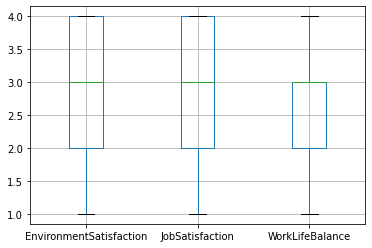

In [158]:
encuesta_empleados.boxplot() #La satisfacción del ambiente y del trabajo se encuentran sesgadas y con un promedio de 3. 
#El balance entre en trebajo y la vida personal tiene su mediana en el extremo superior significando que el 75% de sus empleados 
#se sienten identificados con este valor. Adicionalmente, se observa que el valor mínimo es de 1 y el máximo es de 4

In [159]:
encuesta_empleados['WorkLifeBalance'].unique()

array([2, 4, 1, 3], dtype=int32)

In [160]:
encuesta_empleados

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
EmployeeID,,,
1,3,4,2
2,3,2,4
3,2,2,1
4,4,4,3
5,4,1,3
...,...,...,...
4406,4,1,3
4407,4,4,3
4408,1,3,3


In [161]:
#REalizar gráfico de pastel para ver en qué porcentaje están en cada categoria en cada variable.

fig = px.pie(encuesta_empleados['EnvironmentSatisfaction'].unique(), values = encuesta_empleados['EnvironmentSatisfaction'].value_counts(),  names = encuesta_empleados['EnvironmentSatisfaction'].unique(),
        title = '<b> Nivel de satisfacción con el ambiente de laboral<b>',
             color_discrete_sequence = px.colors.qualitative.G10
        )

fig.show()

#Del grafico se logra inferir que en un 60% de los empleados se encuentran satisfechos con el ambiente laboral en la empresa. ESte es un valor que se puede mejorar por medio de un formulario hacia los 
#empleados sobre qué aspectos les gustaría mejorar en su ambiente laboral y también realizar ejercicios para fortalecer el trabajo en equipo

In [162]:
#REalizar gráfico de pastel para ver en qué porcentaje están en cada categoria en cada variable.

fig = px.pie(encuesta_empleados['JobSatisfaction'].unique(), values = encuesta_empleados['JobSatisfaction'].value_counts(),  names = encuesta_empleados['JobSatisfaction'].unique(),
        title = '<b>Nivel de satisfacción laboral<b>',
             color_discrete_sequence = px.colors.qualitative.G10
        )

fig.show()

#Del gráfico se logra inferir que los valores más votados son el 4 y el 3. Esto significa, que el 70% de los empleados se encuentran satisfechos con su labor.


In [163]:
#REalizar gráfico de pastel para ver en qué porcentaje están en cada categoria en cada variable.

fig = px.pie(encuesta_empleados['WorkLifeBalance'].unique(), values = encuesta_empleados['WorkLifeBalance'].value_counts(),  names = encuesta_empleados['WorkLifeBalance'].unique(),
        title = '<b>Balance trabajo - vida personal<b>',
             color_discrete_sequence = px.colors.qualitative.G10
        )

fig.show()

#Del gráfico se logra inferir que los valores más votados son el 3 y 2. Este valor se da en un 84%, lo cuál significa que la empresa debería hacer algo al respecto ya que evidentemente 
#sus trabajadores tienen que sacrificar mucho en el momento de trabajar

In [164]:
"""##Con respecto a los retiros"""

bd=encuesta_empleados.merge(renuncias,how='left',on='EmployeeID').fillna(0) #Unimos los datos sobre las renuncias con los de esta base de de datos y llenamos los datos inexistentes con 0
bd #Visualizamos

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Resignation
0,1,3,4,2,0.0
1,2,3,2,4,1.0
2,3,2,2,1,0.0
3,4,4,4,3,0.0
4,5,4,1,3,0.0
...,...,...,...,...,...
4405,4406,4,1,3,0.0
4406,4407,4,4,3,0.0
4407,4408,1,3,3,0.0
4408,4409,4,1,3,0.0


In [165]:
bd=bd[bd['Resignation']==1] #Base de datos para analizar los resultados de solo las personas que renunciaron

In [166]:
#¿Cómo afecta el balance entre el trabajo y la vida personal en la satisfacción con el ambiente laboral? 
#¿Cómo afecta la satisfacción laboral al balance entre la vida y el trabajo?

In [167]:
"""---¿Cómo calificaron la satisfacción en la vida trabajo las personas que renunciaron?---"""

# crear dataset
base = bd.groupby(['WorkLifeBalance'])[['EmployeeID']].count().sort_values('WorkLifeBalance',ascending= False).reset_index().rename(columns={'EmployeeID':'Workers'})

# crear gráfica
fig = px.pie(base, values = 'Workers' , names = 'WorkLifeBalance',
             title= '<b> Sattisfacción del Balance vida-trabajo  <b>',
             color_discrete_sequence=px.colors.qualitative.G10)

# agregar detalles a la gráfica
fig.update_layout(
    template = 'simple_white',
    legend_title = '<b> Balance vida-tabajo <b>',
    title_x = 0.5)

fig.show()

#Las personas que renunciaron en un 54.1% calificaron la satisfacción de este campo con un valor de 3, significando que existe un amayor probabilidad de renuncia de las personas que que presentan este
#nivel de satisfacción que las personas que en realidad marcan que están inconformes con los valores como 1 o 2. 
#Cómo era de esperarse la mínoria de personas con la probabilidad de renuncia son aquellas que marcan el valor de 4 en satisfacción.

In [168]:
"""---¿Cómo calificaron la satisfacción del ambiente laboral las personas que renunciaron?---"""

# crear dataset
base = bd.groupby(['EnvironmentSatisfaction'])[['EmployeeID']].count().sort_values('EnvironmentSatisfaction',ascending= False).reset_index().rename(columns={'EmployeeID':'Workers'})

# crear gráfica
fig = px.pie(base, values = 'Workers' , names = 'EnvironmentSatisfaction',
             title= '<b> Sattisfacción del ambiente laboral  <b>',
             color_discrete_sequence=px.colors.qualitative.G10)

# agregar detalles a la gráfica
fig.update_layout(
    template = 'simple_white',
    legend_title = '<b> Ambiente laboral <b>',
    title_x = 0.5)

fig.show()

#No se logra apreciar una diferencia significativa de las personas que renunciaron y marcaron determinado valor en esta sección. El mayor porcentaje de personas que renunciaron marcó un valor de 1
# y el de menor porcentaje el que marco un valor de 2.

In [169]:
"""---¿Cómo calificaron la satisfacción laboral las personas que renunciaron?---"""

# crear dataset
base = bd.groupby(['JobSatisfaction'])[['EmployeeID']].count().sort_values('JobSatisfaction',ascending= False).reset_index().rename(columns={'EmployeeID':'Workers'})

# crear gráfica
fig = px.pie(base, values = 'Workers' , names = 'JobSatisfaction',
             title= '<b> Sattisfacción laboral <b>',
             color_discrete_sequence=px.colors.qualitative.G10)

# agregar detalles a la gráfica
fig.update_layout(
    template = 'simple_white',
    legend_title = '<b> Labor <b>',
    title_x = 0.5)

fig.show()

#La mayoría de personas que renunciaron, habían votado por 3 en esta sección, el menor valor de votación fue el 2

"""*Algunas conclusiones de esta sección son: En 2/3 variables las personas que renunciaron en su mayoría voto un valor de 3, siendo así una calificación peor que la del valor 1.*"""

'*Algunas conclusiones de esta sección son: En 2/3 variables las personas que renunciaron en su mayoría voto un valor de 3, siendo así una calificación peor que la del valor 1.*'

## Exportar Bases Depuradas

In [367]:
# Se exporta los dataframe a formato a csv
renuncias.to_csv('renuncias.csv')
general_empleados1.to_csv('df_general_empleados1.csv')
desempeno.to_csv('df_desempeno.csv')
salidas.to_csv('df_out_time.csv')
entradas.to_csv('df_in_time.csv')
encuesta_empleados.to_csv('df_encuesta_empleados.csv')